# 1 Package Loading and Preparing

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import random
# import pytorch_lightning as pl

# from gluonts.dataset.common import ListDataset
# from gluonts.dataset.util import to_pandas

# from pts.model.deepar import DeepAREstimator
# from pts import Trainer
import yfinance as yf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [42]:
## Fetch the Engery Sector SP500 Stocks

axp = yf.Ticker("AXP")
adj_close = axp.history(start = "2020-01-01", end = "2021-12-31")["Close"]

# 2020-2021 two year prices
sp500_index_train = yf.download('^GSPC', start='2020-01-01', end='2021-12-31')["Adj Close"]

# 2022 annual prices, to be predicted
sp500_index_test = yf.download('^GSPC', start='2022-01-01', end='2022-12-31')["Adj Close"]

adj_close = sp500_index_train
adj_close_df = pd.DataFrame(adj_close)
n = adj_close.shape[0]

# Extract adjusted closing prices
print(adj_close.head())
print(n)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
Name: Adj Close, dtype: float64
504


# 2 Noise Perturbing

In [43]:
import math
import scipy.stats
import numpy as np
## Forward Markov Chain
## Perturbing noise in the price until totally random

def corrput(data, beta = None, t = 200):
  """
  Inputs:
    data: A Series
    t: An positive integer
    beta: A list of hyperparameters that control the variance of the noise
          within the range of [0,1] and is non-decreasing
  Output: A Series
  This function addes noise to the stock data and returns this stock data but pertubed
    t times.
  """
  beta = beta = [0.003] * adj_close.shape[0] if beta == None else beta
  
  alpha_bar = 1
  for i in range(t):
    alpha_bar *= 1 - beta[i]
    #alpha.append(1 - beta[i]) # reparameterized by the last hypermeter
  
  for i in range(len(data)): # pertubing noise n times into each observations of data
    data.iloc[i,0] = math.sqrt(alpha_bar) * data.iloc[i,0] + math.sqrt(1 - alpha_bar) * random.normalvariate(0,1)
  return data


class DiffusionModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(DiffusionModel, self).__init__()
    # Define the architecture using reversible transformations

  def forward(self, x):
    # Implement the forward pass through reversible transformations
    return x

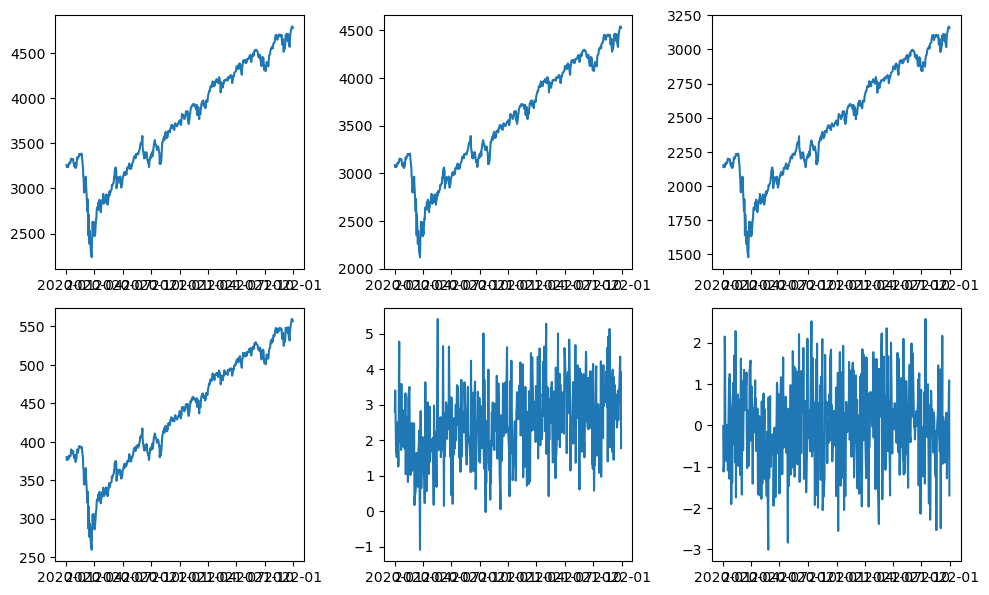

In [52]:
## Demo for the Noise Perturbing
cor_axp = adj_close_df.copy()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig_count = 0

for time in range(200):# add noise 200 times
  if time in [0, 9, 24, 54, 99,199]:
    axes[fig_count // 3, fig_count % 3].plot(cor_axp)
    fig_count += 1
  cor_axp = corrput(cor_axp, t =time) # add noise once

fig.tight_layout()

# 3 Denoising NN training 

In [46]:
## Assigned to Linyu
def denoise(data):
    """
    Takes a noise-peturbed data and try to denoise it.
    Output: A DataFrame of two
    """

# 4 

In [ ]:
cor_axp.

## MLP

In [ ]:
## Assgined to Yanda
### Could try different time steps  (e.g. 7-day)
def splitSeries(data, steps = 30):
    """
    Split a given univariate Series into multiple segments with length equal to steps.
    Input:
        data: A DataFrame
        steps: A positive int
    Output:
        A new data frame that represents the segements of time series
    """
    # univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
 print(X[i], y[i])

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

## 5 Predicting New 